
<h1><center>Titanic Data Analysis</center></h1>


The sinking of the Titanic has been (and remains to this day) an unprecedented catastrophe, in terms both of human loss and the high profile and publicity surrounding the event. This analysis tells the story of this tragedy with data, most specifically with pandas and data frames. This analysis relies proponderently on descriptive statistics and visualisations, so it's conclusions should be treated as **tentantive**.  

The question we want to ask is this: *Did any individual characteristics have any impact on survival so that certain individuals stood higher chances of survival in virtue of those characteristics?* More specifically, we'll look at whether the age, gender, title, passenger class, number of siblings on-board and number of parents/children on-board had an impact on their likelihood of surviving. We'll conclude that gender, age and passenger class are the three characteristics that bear a relationship with survival. 

Let's import the relevant packages needed for analysis and preview the existing data.



In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
dft = pd.read_csv('titanic-data.csv')

In [3]:
#preview the initial dataset
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


A cursory glance over the columns of the dataframe suggests that only some of the existing passenger data is directly relevant to our analysis. Most specifically, we drop Passenger Id, Ticket, Cabin, Embark and Fare to keep things cleaner and work with a smaller (and easier to visualise) dataset. As the Age column contains missing data (i.e. more than 150 observations in the Age column contain NaNs) we'll drop the observations with the missing values. This seems like the most sensible thing to do as replacing the missing values with either the mean or median for the column would skew the data towards the mean or median respectively. 

In [4]:
#drop variables not used in the analysis
df = dft.drop(['PassengerId', 'Ticket', 'Cabin', 'Embarked', 'Fare'], axis = 1)

In [5]:
#preview the working dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


In [6]:
#drop the missing values from the age column
df['Age'].dropna(inplace=True)

In [7]:
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0
5,0,3,"Moran, Mr. James",male,NaN,0,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0


With a complete dataset with no missing values, let's look at the overall survival rate of all passengers aboard the Titanic:

In [8]:
#overall survival rate of all passengers
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

With an overall survival rate of 38%, the prospect of surviving the Titanic disaster looked pretty grim. But is there any particular characteristic that increased these odds? Let's start by checking whether age had an impact on survival. 

### Age & Survival

Let's look at some age-specific descriptive statistics first. 

In [9]:
#mean of Age
df['Age'].mean()

29.69911764705882

In [10]:
#percentages of the top 10 values for Age 
df['Age'].value_counts(normalize=True).head(10)

24.0    0.042017
22.0    0.037815
18.0    0.036415
19.0    0.035014
30.0    0.035014
28.0    0.035014
21.0    0.033613
25.0    0.032213
36.0    0.030812
29.0    0.028011
Name: Age, dtype: float64

In [11]:
#max of Age
df['Age'].max()

80.0

In [12]:
#min of Age
df['Age'].min()

0.41999999999999998

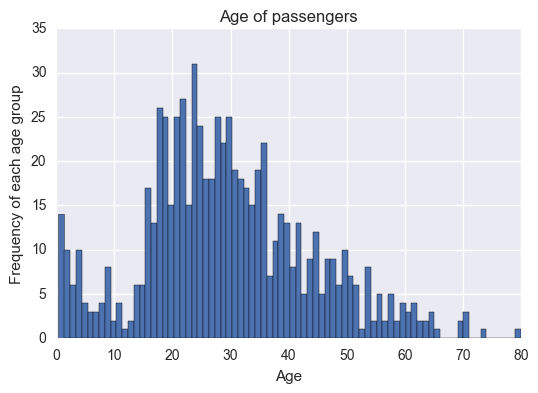

In [13]:
#Histogram of Age
df ['Age'].hist(bins=80)
plt.title('Age of passengers')
plt.ylabel('Frequency of each age group')
plt.xlabel('Age')

It looks like most passengers on board the Titanic were young adults (between 20 to 30 years old), but the age spread is wide and ranges from 0.4 to 80 year olds. 

To check whether age was relevant to survival, let's group the age data into three categories: children, adults and seniors. Let's examine whether two of these age groups, Children and Seniors (i.e.men and women over the age of 65) stood higher or lower chances of survival. 
To determine if and how much age mattered to survival, I'll pick different cut-off points in defining the children category, i.e. at 5, 10, 14 and 18 years old. 

In [14]:
#create column with Age values for children under 18
df['Child18'] = df['Age'].apply(lambda age: age < 18)

In [15]:
#create column with Age values for children under 14
df['Child14'] = df['Age'].apply(lambda age: age < 14)

In [16]:
#create column with Age values for children under 10
df['Child10'] = df['Age'].apply(lambda age: age < 10)

In [17]:
#create column with Age values for children under 5
df['Child5'] = df['Age'].apply(lambda age: age < 5)

In [18]:
#percentage of children under 18
df['Child18'].value_counts()

False    601
True     113
Name: Child18, dtype: int64

In [19]:
#percentage of children under 14
df['Child14'].value_counts()

False    820
True      71
Name: Child14, dtype: int64

In [20]:
#percentage of children under 10
df['Child10'].value_counts()

False    829
True      62
Name: Child10, dtype: int64

In [21]:
#percentage of children under 5
df['Child5'].value_counts()

False    851
True      40
Name: Child5, dtype: int64

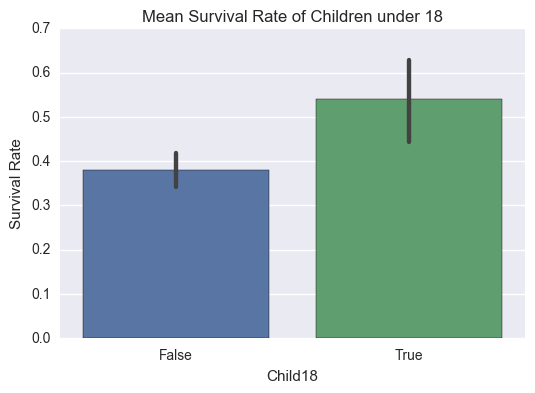

In [22]:
#Barplot of survival rate for children under 18
sns.barplot(x="Child18", y="Survived", data=df)
plt.title('Mean Survival Rate of Children under 18')
plt.ylabel('Survival Rate')

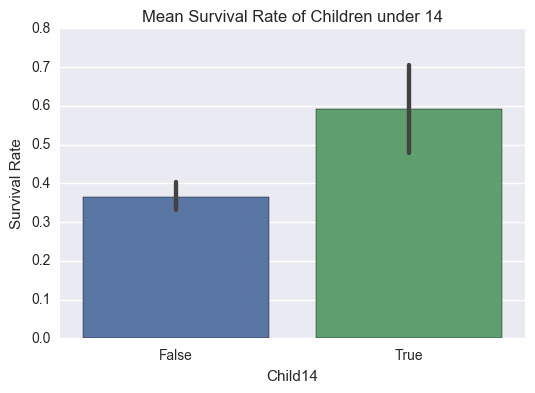

In [23]:
#Barplot of survival rate for children under 14
sns.barplot(x="Child14", y="Survived", data=df)
plt.title('Mean Survival Rate of Children under 14')
plt.ylabel('Survival Rate')

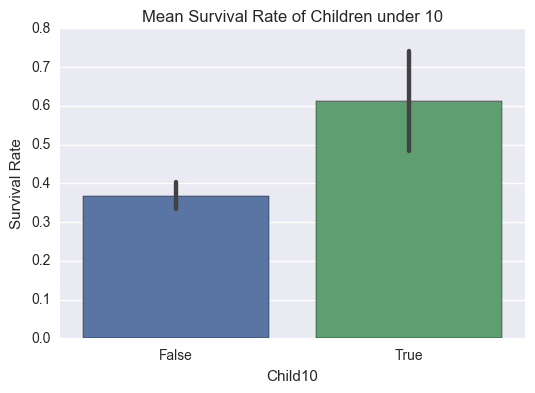

In [24]:
#Barplot of survival rate for children under 10
sns.barplot(x="Child10", y="Survived", data=df)
plt.title('Mean Survival Rate of Children under 10')
plt.ylabel('Survival Rate')

In [25]:
#create column with Age values for seniors over 65
df['Senior'] = df['Age'].apply(lambda age: age > 65)

In [26]:
#percentage of seniors
df['Senior'].value_counts()

False    883
True       8
Name: Senior, dtype: int64

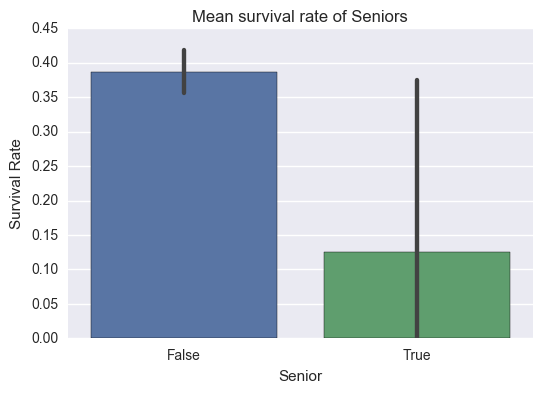

In [27]:
#barplot of survival rate of seniors
sns.barplot(x="Senior", y="Survived", data=df)
plt.title('Mean survival rate of Seniors')
plt.ylabel('Survival Rate')

Looking at the two bar plots above, the mean survival rate of children appears higher than the mean survival rate of non-children so being a child on board of the Titanic did seem to increase, even if slightly, one's likelihood of survival. Moreover, the mean survival rate increases the lower the cut-off point for 'child' is, so that the survival rate of children under 5 is the highest. In the case of seniors, that does not actually hold true, as the mean survival rate of seniors was lower than that of non-seniors. Also, the overlapping error bars in the barplot above suggests that the difference between seniors and non-seniors is not statistically significant.

But is there an significant correlation between being a child and surviving the Titanic disaster? Running the simple correlation below suggests that the correlation is not significant whether we define the children category as under 5s, under 10s, under 14s or under 18s. So while the number of children who survived is higher than those of non-children, it is not significant enough to assert that there is a necessary correlation between survival and age. 


In [28]:
#correlation between survival and being a child under 18
df[['Survived', 'Child18']].corr()

,Survived
Survived,1.0


In [29]:
#correlation between survival and being a child under 14
df[['Survived', 'Child14']].corr()

,Survived,Child14
Survived,1.000000,0.125678
Child14,0.125678,1.000000


In [30]:
#correlation between survival and being a child under 10
df[['Survived', 'Child10']].corr()

,Survived,Child10
Survived,1.000000,0.128812
Child10,0.128812,1.000000


In [31]:
#correlation between survival and being a child under 5
df[['Survived', 'Child5']].corr()

,Survived,Child5
Survived,1.000000,0.129801
Child5,0.129801,1.000000


Let's see whether a Chi-square test of independence can tell us more about whether there is a significant correlation between age and survival. Our null hypothesis is that survival and being a child are independent, so that there is relationship between the two. Let's see what we can assert about the relationship between survival and being a child under 5 and then under 14.

In [32]:
#create table for chi-square test
Child5_Survived =pd.crosstab(df['Survived'],
df['Child5'])
 
print (Child5_Survived)

Child5    False  True 
Survived              
0           536     13
1           315     27


In [33]:
#chi-square test of independence between survival and being a child under 5
chiSq_Child5= scp.chi2_contingency(Child5_Survived)
 
print (chiSq_Child5)
 

(13.750528672429233, 0.0002087620559951837, 1, array([[ 524.35353535,   24.64646465],
       [ 326.64646465,   15.35353535]]))


In [34]:
#create table for chi-square test
Child14_Survived =pd.crosstab(df['Survived'],
df['Child14'])
 
print (Child14_Survived)

Child14   False  True 
Survived              
0           520     29
1           300     42


In [35]:
#chi-square test of independence between survival and being a child under 14
chiSq_Child14= scp.chi2_contingency(Child14_Survived)
 
print (chiSq_Child14)

(13.13524725580487, 0.00028979202934255793, 1, array([[ 505.25252525,   43.74747475],
       [ 314.74747475,   27.25252525]]))


Our p-value for both cases are less than the significance level (0.05) so we can reject the null hypothesis that there is no relationship between survival and being a child. We therefore accept the alternative hypothesis that there is a relationship between survival and being a child under 5 or under 14. 

### Gender & Survival

Being a child of a senior on board the Titanic did not seem to make much of a difference to survival. How about gender? Did survival depend on whether one was male or female?

A few descriptive statistics first. 



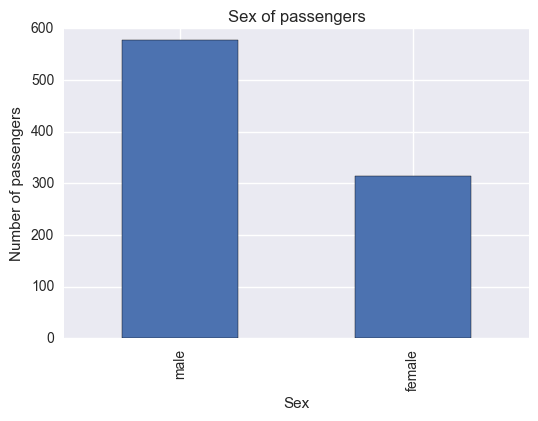

In [36]:
#Barchart of gender
df['Sex'].value_counts().plot(kind='bar')
plt.title('Sex of passengers')
plt.ylabel('Number of passengers')
plt.xlabel('Sex')

In [37]:
#percentage of females who survived
df[df['Sex'] =='female']['Survived'].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [38]:
#percentage of males who survived
df[df['Sex'] =='male']['Survived'].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

While the total number of males on board the Titanic was significantly higher than that of females, the survival rates of males was much lower than that of females. Out of all males, only 19% of them survived, while of all females, 74% survived. But is the correlation between survival and gender statistically significant? Let's run a simple correlation to figure that out.

In [39]:
#create numerical proxy variable for sex
df['sex_encoding'] = df['Sex'].apply(len)

In [40]:
#correlation between sex and survival
df[['Survived', 'sex_encoding']].corr(method='pearson')

,Survived,sex_encoding
Survived,1.000000,0.543351
sex_encoding,0.543351,1.000000


There is indeed a moderately strong correlation between sex and survival, so that it does seem to be the case that survival was likelier if one was female than if one was male. That finding seems to match the intuition (and what we otherwise know about the aftermath of the event) that females were boarded on rescue boats first, so that the number of females who made it to the shore was ultimately higher than that of males. 



### The combined effect of Gender and Age on Survival

Let's draw a barplot to visualise the mean survival rate of both gender and age:

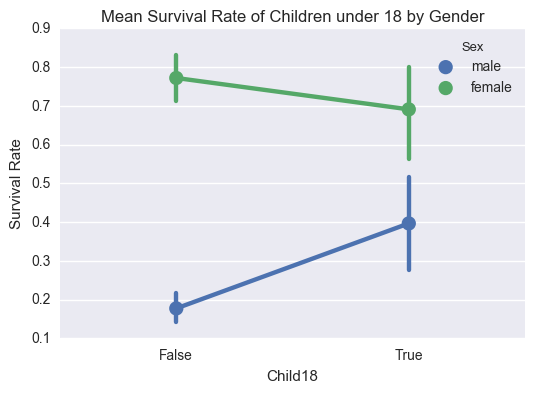

In [41]:
#slope graph for the survival rate of children under 18
sns.pointplot(x="Child18", y="Survived", hue="Sex", data=df)
plt.title('Mean Survival Rate of Children under 18 by Gender')
plt.ylabel('Survival Rate')

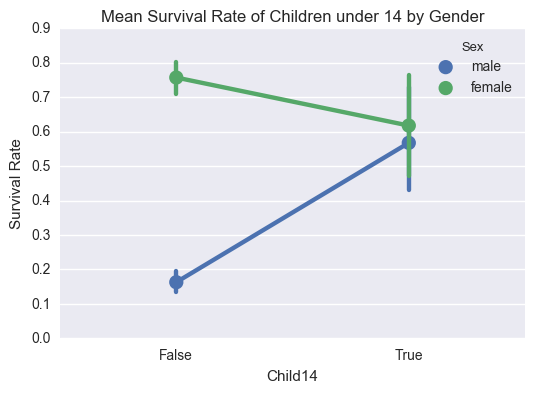

In [42]:
#slope graph for the survival rate of children under 14
sns.pointplot(x="Child14", y="Survived", hue="Sex", data=df)
plt.title('Mean Survival Rate of Children under 14 by Gender')
plt.ylabel('Survival Rate')

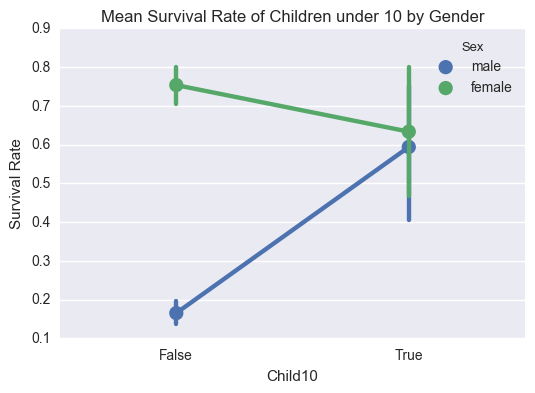

In [43]:
#slope graph for the survival rate of children under 10
sns.pointplot(x="Child10", y="Survived", hue="Sex", data=df)
plt.title('Mean Survival Rate of Children under 10 by Gender')
plt.ylabel('Survival Rate')

It seems straightforward from the above that the survival rates of women were significantly higher than those of males, whether those females were children or adults. What is interesting though is that the mean survival rate of girls was lower than that of adult women, which suggests again that being a child had a weaker effect on survival than being a female.

### Title & Survival

Of all characteristics that might affect survival, one's title might potentially have an impact.  While there was no Title column in the database, we extracted one's title from the Name column by splitting the actual title from the name. We found that there are six different categories of titles: Mr, Miss, Mrs, Master, Dr and Reverend. Does any of these have an impact on survival? Let's check a few descriptive statistics. 

In [44]:
df['Name'].iloc[0].split()[1]

'Mr.'

In [45]:
#function to split title from name
df['Title'] = df['Name'].apply(lambda name: name.split()[1])

In [46]:
#kind and number of different titles for analysis
df['Title'].value_counts().head(6)

Mr.        502
Miss.      179
Mrs.       121
Master.     40
Dr.          7
Rev.         6
Name: Title, dtype: int64

In [47]:
#function that extracts survival rate for each title
def Survived(title):
    print(df[df['Title'] == title]['Survived'].value_counts(normalize=True))

In [48]:
Survived('Miss.')

1    0.703911
0    0.296089
Name: Survived, dtype: float64


In [49]:
Survived('Mr.')

0    0.842629
1    0.157371
Name: Survived, dtype: float64


In [50]:
Survived('Mrs.')

1    0.801653
0    0.198347
Name: Survived, dtype: float64


In [51]:
Survived('Master.')

1    0.575
0    0.425
Name: Survived, dtype: float64


In [52]:
Survived('Dr.')

0    0.571429
1    0.428571
Name: Survived, dtype: float64


In [53]:
Survived('Rev.')

0    1.0
Name: Survived, dtype: float64


In [54]:
#list of passenger with Rev title
df[df['Title'] == 'Rev.']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Child18,Child14,Child10,Child5,Senior,sex_encoding,Title
149,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,False,False,False,False,False,4,Rev.
150,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,False,False,False,False,False,4,Rev.
249,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,False,False,False,False,False,4,Rev.
626,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,False,False,False,False,False,4,Rev.
848,0,2,"Harper, Rev. John",male,28.0,0,1,False,False,False,False,False,4,Rev.
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,False,False,False,False,False,4,Rev.


In [55]:
#percentage of males over 27 who survived
df[(df['Age'] > 27) & (df['Sex'] == 'male')]['Survived']. value_counts(normalize=True)

0    0.811245
1    0.188755
Name: Survived, dtype: float64

Looking at the survival rates above, there are a few unsurprising findings and a few interesting ones. It looks like the titles Miss and Mrs have high percentages of survival (70% and 80% respectively) which pretty much mirrors the findings we had when checking whether gender was relevant to survival. Similarly, the percentage rates of survival for Mr and Master are lower which again matches what we found earlier about the survival rates of males. What is interesting however is that all those with the title Reverend (i.e. 6 passengers on board) have all died. Looking at their other characteristics, it turns out that they were all male with ages ranging between 27 and 54 years old. But could it be perhaps the case that the low survival rate is explained by their age and/or gender rather than their title? A quick look at the survival rate of males over 27 years old and we can tell that the numbers don't look to good there either - the rate of survival is 19%. Without taking this analysis in more depth, it unclear whether the survival rate of Reverends is explained by their religious convictions or by the fact that they were all adult males or it is overdetermined (i.e. explained by gender, age AND religious convictions).

### Passenger Class & Survival

As Passenger Class is likely (or standardly) indicative of wealth and status, it seems interesting to check whether survival is correlated with it. Let's check a few descriptive statistics about the number of people who checked in first, second and third class. 

In [56]:
#list of column values for all passenger classes
df.groupby('Pclass').describe()

Age       Parch       SibSp    Survived  sex_encoding
Pclass                                                                    
1      count  186.000000  216.000000  216.000000  216.000000    216.000000
       mean    38.233441    0.356481    0.416667    0.629630      4.870370
       std     14.802856    0.693997    0.611898    0.484026      0.993866
       min      0.920000    0.000000    0.000000    0.000000      4.000000
       25%     27.000000    0.000000    0.000000    0.000000      4.000000
       50%     37.000000    0.000000    0.000000    1.000000      4.000000
       75%     49.000000    0.000000    1.000000    1.000000      6.000000
       max     80.000000    4.000000    3.000000    1.000000      6.000000
2      count  173.000000  184.000000  184.000000  184.000000    184.000000
       mean    29.877630    0.380435    0.402174    0.472826      4.826087
       std     14.001077    0.690963    0.601633    0.500623      0.987448
       min      0.670000    0.000000    0.000000    0.000000      4.000000
       25%     23.000000    0.000000    0.000000    0.000000      4.000000
       50%     29.000000    0.000000    0.000000    0.000000      4.000000
       75%     36.000000    1.000000    1.000000    1.000000      6.000000
       max     70.000000    3.000000    3.000000    1.000000      6.000000
3      count  355.000000  491.000000  491.000000  491.000000    491.000000
       mean    25.140620    0.393075    0.615071    0.242363      4.586558
       std     12.495398    0.888861    1.374883    0.428949      0.911459
       min      0.420000    0.000000    0.000000    0.000000      4.000000
       25%     18.000000    0.000000    0.000000    0.000000      4.000000
       50%     24.000000    0.000000    0.000000    0.000000      4.000000
       75%     32.000000    0.000000    1.000000    0.000000      6.000000
       max     74.000000    6.000000    8.000000    1.000000      6.000000

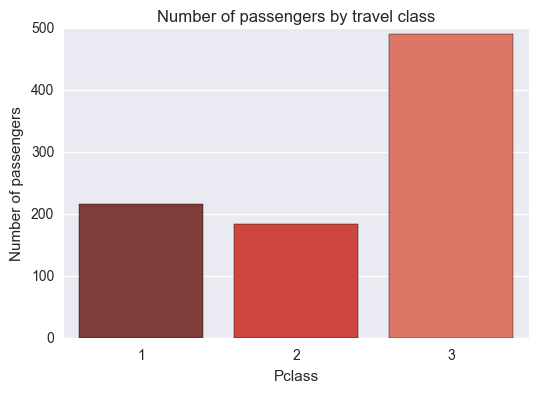

In [57]:
#Countplot of passenger class
sns.countplot(x="Pclass", data=df, palette="Reds_d")
plt.title('Number of passengers by travel class')
plt.ylabel('Number of passengers')

In [58]:
#percentage of passengers by travel class
df ['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [59]:
#function that extracts survival rate for each travel class
def Survived(pclass):
    print(df[df['Pclass'] == pclass]['Survived'].value_counts(normalize=True))

In [60]:
Survived(1)

1    0.62963
0    0.37037
Name: Survived, dtype: float64


In [61]:
Survived(2)

0    0.527174
1    0.472826
Name: Survived, dtype: float64


In [62]:
Survived(3)

0    0.757637
1    0.242363
Name: Survived, dtype: float64


Unsurprisingly, the great majority of passengers (almost 500 people and about 55% of all passengers) checked in third class and it does seem interesting that the survival rates of those in third class are the lowest. While 62% of people who bought first class tickets and 47% of people who bought second class tickets survived, only 24% of people who travelled third class actually survived. This seems to point to some correlation between class and survival, but can we be sure that this is not just noise?
Let's draw below visualisation of the mean survival with the combined effect of gender and class:

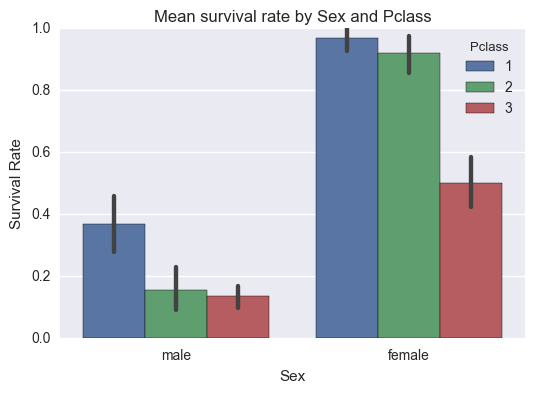

In [63]:
#barplot for survival rate by sex and travel class
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)
plt.title('Mean survival rate by Sex and Pclass')
plt.ylabel('Survival Rate')

While class does seem to make a difference to survival regardless of one's gender (i.e. mean survival is higher for those in first class regardless whether they were male or female), class seems to have a weaker effect than gender does. The barplot above makes pretty clear that the mean survival rates of women were significantly higher than those of males, regardless what passenger class they were in.
Let's run a simple correlation to see whether that is indeed the case:

In [64]:
#correlation between survival and travel class
df[['Survived', 'Pclass']].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


The correlation results above show a weak negative linear relationship between class and survival so while class does seem to have an impact on survival it is, all things considered, a weak one. 

### Number of Siblings and Spouses & Survival

Does the number of siblings and spouses on board affect survival? An initial intuition is that it might, as people with the highest number of family members on board might be the ones who would not want to leave their relatives behind and the least likely to rush to save themselves first. But let's see if this theoretical intuition holds true and look at a few descriptive stats first.

In [65]:
#percentage of passengers with different number of siblings/spouses on board
df['SibSp'].value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

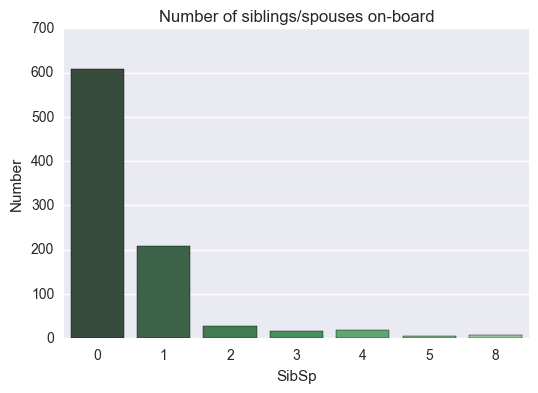

In [66]:
#countplot for the number of siblings/spouses 
sns.countplot(x="SibSp", data=df, palette="Greens_d")
plt.title('Number of siblings/spouses on-board')
plt.ylabel('Number')


In [67]:
#percentage of passengers who survived grouped by number of siblings/spouses on-board
SipSp_perc = dft[["SibSp", "Survived"]].groupby(['SibSp']).mean()

In [68]:
SipSp_perc

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [69]:
#list of passengers with the max number of siblings/spouses on-board
df[df['SibSp'] == df['SibSp'].max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Child18,Child14,Child10,Child5,Senior,sex_encoding,Title
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,NaN,False,False,False,False,4,Master.
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,NaN,False,False,False,False,6,Miss.
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,NaN,False,False,False,False,4,Mr.
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,NaN,False,False,False,False,4,Mr.
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,NaN,False,False,False,False,6,Miss.
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,NaN,False,False,False,False,4,Mr.
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,NaN,False,False,False,False,6,Miss.


While most passengers on board had no siblings, the survival rates seem highest for the group with one sibling/spouse on board. Interestingly though, the passengers with the highest number relatives on-board (who are, by the way, all related as they share the same last name) did not survive, which seem to hint at the intuition that 'siblings/spouses don't let their siblings/spouses die' might contain a grain of truth. 

Drawing a barplot of the combined effect of SibSp and Sex below suggest that the sibling/spouse effect is much lower than the gender effect as the mean survival rates are much more sensitive to gender differences than to a difference in the number of siblings/spouses on-board. 

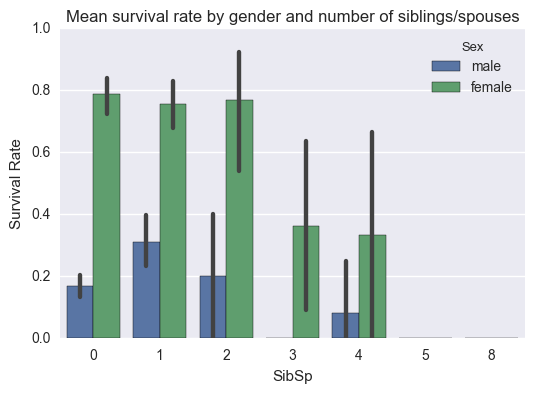

In [70]:
#barplot of survival rate by gender and number of siblings/spouses 
sns.barplot(x="SibSp", y="Survived", hue="Sex", data=df)
plt.title('Mean survival rate by gender and number of siblings/spouses')
plt.ylabel('Survival Rate')

Indeed, running a simple correlation between survival and number of siblings/spouses suggests that the effect of Sibsp is too weak to be significant so there is no relevant correlation between the two.

In [71]:
#correlation between survival and number of spouses/siblings
df[['Survived', 'SibSp']].corr()

,Survived,SibSp
Survived,1.000000,-0.035322
SibSp,-0.035322,1.000000


### The Impact of Parch on Survival

Does the number of parents and children on-board affect survival? My initial intuition is similar to the one around SipSp so that people with the highest number of parents/children on board might be the ones who would not want to leave their relatives behind and the least likely to rush to save themselves first. But let's see if this theoretical intuition holds true and look at a few descriptive stats first.

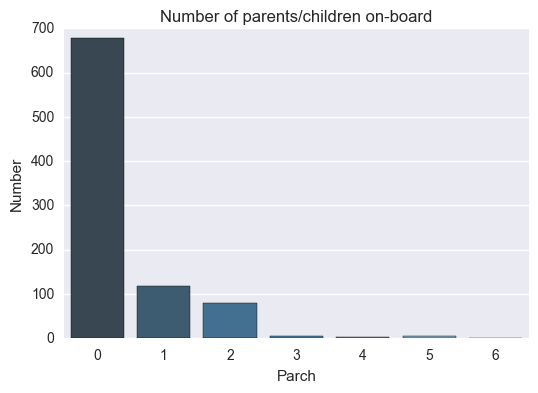

In [72]:
#countplot of number of parent/children on-board
sns.countplot(x="Parch", data=df, palette="Blues_d")
plt.title('Number of parents/children on-board')
plt.ylabel('Number')

In [73]:
#percentage of passengers who survived grouped by number of parents/children on-board
Parch_perc = dft[["Parch", "Survived"]].groupby(['Parch']).mean()

In [74]:
Parch_perc

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [75]:
#passenger with the max number of parents/children on board
df[df['Parch'] == df['Parch'].max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Child18,Child14,Child10,Child5,Senior,sex_encoding,Title
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,False,False,False,False,False,6,Mrs.


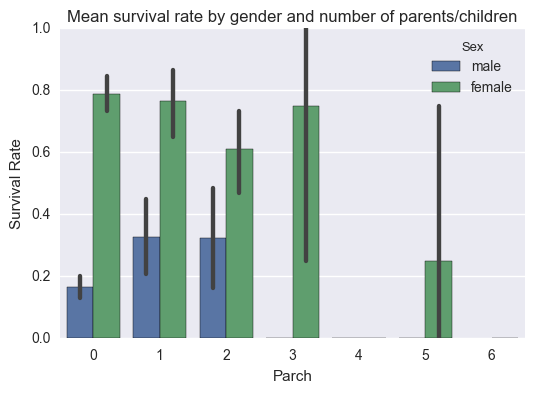

In [76]:
#barplot of mean survival rate by gender and number of parents/children
sns.barplot(x="Parch", y="Survived", hue="Sex", data=df)
plt.title('Mean survival rate by gender and number of parents/children')
plt.ylabel('Survival Rate')

The Parch data looks unsuprisingly similar to the SibSp. While most passengers had no parents/children on-board, the survival rates seem highest for the group with one parent/child on board. Interestingly though, the passenger with the highest number of parents/children on-board did not survive. Is there, however, any significant correlation between number of parents and children and survival?

In [77]:
#correlation between survival and number of parents/children
df[['Survived', 'Parch']].corr()

,Survived,Parch
Survived,1.000000,0.081629
Parch,0.081629,1.000000


The correlation coefficient above does not seem to suggest that a correlation exists so that the number of parents/children on-board does not seem to have an effect on survival. 

### Conclusion

Perhaps unsurprisingly, knowing what we now know about the Titanic disaster, three things made a difference to one's survival: one's gender, one's age (i.e., whether one was a child or an adult) and one's wealth/status as reflected in the passenger class. Being female and being a child made the most significant difference as females and children were the first to make it safe to the shore. Passenger Class seem to have mattered to some extent as well, as the people with resources probably had an advantage in accessing the few available rescue boats. So Sex, Age and Pclass were the three characteristics that made the most difference to surviving the Titanic disaster. 

### Limitations and Further Research

While this is a nice dataset to work with for an initial exploration of what made survival of the Titanic more likely, the dataset is incomplete both because of the high number of missing values and the total number of actual observations. In fact, with 891 observations, the dataset contains less than 50% of all the Titanic passenger data. Before looking into the reasons why the dataset is incomplete, we must allow for the possibility of bias in the selection of the sample and thus refrain from drawing decisive conclusions about current variable correlations.

Also, to get a more complete picture of the whole range of factors that had an impact on survival, it would have been interesting to have 'country of origin', religious affiliation and perhaps profession as additional variables in the dataset. We might then have been able to produce a list of 'golden characteristics' that act as advantages in critical social situations such as the Titanic disaster. Some of these factors would reflect moral norms, social conventions but also, most likely, prejudices and steretypes. Holding the effect of physical/natural phenomena constant, it would be interesting to explore whether similar factors are at play in influencing who gets to live or die in disasters and catastrophes of other kinds. 


